# 1 Download the 2019 Chapel Hill expert survey data set from <https://www.chesdata.eu/2019-chapel-hill-expert-survey> and preprocess it as you see fit.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CHES2019V3.csv')
df

,country,eastwest,party,party_id,eu_position,eu_position_sd,eu_salience,eu_dissent,eu_blur,eu_cohesion,...,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_econ_require,eu_political_require,eu_googov_require
0,1,1.0,PS,102,6.083334,0.288675,4.272728,2.750000,2.166667,6.250,...,6.000000,0.111111,2.111111,3.363636,2.181818,1.909091,7.500000,NaN,NaN,NaN
1,1,1.0,SP/SPA,103,6.000000,0.426401,4.181818,2.500000,1.714286,6.000,...,5.333334,0.111111,2.222222,3.545454,2.090909,1.636364,6.818182,NaN,NaN,NaN
2,1,1.0,ECOLO,104,6.583334,0.514929,4.818182,2.500000,1.428572,6.000,...,6.166666,0.111111,2.888889,5.636363,2.454546,2.363636,3.909091,NaN,NaN,NaN
3,1,1.0,AGALEV,105,6.583334,0.514929,4.818182,2.500000,1.285714,5.875,...,6.083334,0.111111,2.777778,5.636363,2.363636,2.000000,4.000000,NaN,NaN,NaN
4,1,1.0,PRL/MR,106,6.500000,0.674200,5.090909,2.000000,1.714286,5.500,...,6.416666,0.111111,2.333333,4.636363,1.727273,1.636364,7.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,45,NaN,M,4504,1.200000,0.447214,5.600000,2.000000,0.500000,NaN,...,4.000000,0.800000,2.000000,3.200000,4.400000,1.500000,9.400000,NaN,NaN,NaN
273,45,NaN,Sam,4505,6.400000,0.547723,6.800000,2.333333,4.000000,NaN,...,6.000000,0.000000,0.000000,5.000000,1.400000,5.800000,6.400000,NaN,NaN,NaN
274,45,NaN,Pi,4506,4.800000,0.447214,4.600000,3.333333,4.500000,NaN,...,6.000000,0.000000,0.000000,5.800000,6.200000,8.400000,2.800000,NaN,NaN,NaN
275,45,NaN,V,4507,6.600000,0.547723,8.000000,2.000000,2.500000,NaN,...,6.000000,0.000000,0.000000,3.600000,0.200000,4.600000,7.400000,NaN,NaN,NaN


Immediately we see lots of NaNs everywhere so there's going to be a lot of preprocessing invloved. Lets start with looking what we are dealing with and look at all the columns we need to preprocess

In [3]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
country,277.0,19.4,12.4,1.0,8.0,21.0,29.0,45.0
eastwest,247.0,0.6,0.5,0.0,0.0,1.0,1.0,1.0
party_id,277.0,1951.2,1242.8,102.0,811.0,2102.0,2902.0,4508.0
eu_position,277.0,4.9,1.7,1.0,3.8,5.4,6.4,6.9
eu_position_sd,277.0,0.8,0.4,0.0,0.6,0.7,1.1,2.1
eu_salience,277.0,5.9,1.6,1.2,4.7,5.8,7.1,9.9
eu_dissent,275.0,2.6,1.4,0.0,1.5,2.3,3.5,8.0
eu_blur,276.0,3.4,1.8,0.0,1.9,3.2,4.5,9.0
eu_cohesion,247.0,5.4,1.2,1.0,4.8,5.8,6.2,7.0
eu_foreign,246.0,4.0,1.5,1.0,2.9,4.3,5.2,6.5


## Drop redundant columns

We drop 'eastwest' as it is not relevant and more from a pseudoscience -- geography can not determinte political views, it's a fact. Last three columns we drop because they are relevant only for one country and describe one very specific case

In [4]:
cols = ['eastwest', 'eu_econ_require', 'eu_political_require', 'eu_googov_require']
df = df.drop(cols, axis=1)

The following 5 columns we drop because they are suitable only for a subset of countries (the EU) and we can not predict or replace that values for non-EU countries, using mean\median or any other replacement also seems redundant

In [5]:
df[df['eu_cohesion'].isna()]

,country,party,party_id,eu_position,eu_position_sd,eu_salience,eu_dissent,eu_blur,eu_cohesion,eu_foreign,...,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership
230,34,AKP,3401,3.8,2.0,3.1,2.0,6.6,nan,nan,...,9.3,5.9,3.6,9.3,3.6,nan,4.1,7.8,0.4,9.8
231,34,CHP,3402,6.1,0.6,4.2,3.2,2.8,nan,nan,...,3.4,2.9,5.2,5.1,4.0,nan,4.0,4.2,8.9,6.1
232,34,MHP,3403,2.2,0.8,2.7,0.2,1.8,nan,nan,...,10.0,6.0,6.0,10.0,4.6,nan,3.1,5.4,0.5,9.8
233,34,HDP,3407,6.3,0.7,4.3,2.5,0.5,nan,nan,...,0.9,5.1,6.1,0.0,2.6,nan,5.8,6.1,8.9,4.1
234,34,IYI,3408,5.0,1.0,2.7,2.0,4.2,nan,nan,...,7.9,4.4,5.7,8.6,5.0,nan,3.9,4.7,8.1,8.1
235,35,Ap,3501,5.4,0.5,3.8,5.5,6.5,nan,nan,...,4.1,4.2,5.3,5.3,1.7,1.9,2.6,1.4,1.8,6.1
236,35,FrP,3502,3.1,1.8,3.6,4.2,3.8,nan,nan,...,8.8,5.0,4.4,6.2,1.2,8.5,6.6,7.7,2.0,7.0
237,35,H,3503,6.3,0.7,4.1,2.0,3.2,nan,nan,...,4.4,2.9,2.7,6.9,2.0,2.4,2.4,1.2,1.4,6.3
238,35,SV,3504,1.7,0.7,4.8,2.2,1.8,nan,nan,...,2.3,3.3,7.4,4.3,1.2,1.6,4.7,3.8,2.6,5.0
239,35,Sp,3505,1.1,0.3,7.9,0.5,0.0,nan,nan,...,6.6,9.7,9.4,0.7,1.1,2.6,6.4,6.6,1.9,5.0


In [6]:
cols = ['eu_cohesion', 'eu_foreign', 'eu_intmark', 'eu_budgets', 'eu_asylum' ]
df = df.drop(cols, axis=1)

For the following columns the best solution I could think of was to replace missing values with mean score by the country. Of course, "standard" approach would be to replace them with total set's average, but in the case of political views it seemed to me that the whole set of european countries does not define political views of individual parties. It's the voters of the country itself and their political views that project the views of the parties they are represented by. Country itself defines cultural and political context much more than the neighbouring countries or maybe even the ones that are just happen to be on the same continent

In [7]:
def replace_with_country_mean(df, col):
    df_t = df[df[col].isna()]

    for index, row in df_t.iterrows():    
        mean_value = df[df['country'] == row['country']][col].mean()
        df.loc[index, col] = mean_value
    
    return df

Also the following columns are "important" (so we should not drop it) because they are more objective and suitable for each country independently of their position in EU, EEA or other options (well, most of those columns)

In [8]:
cols = ['eu_dissent', 'eu_blur', 'lrecon_dissent', 'lrecon_blur', 'galtan_blur',
       'immigrate_dissent', 'multicult_salience', 'multicult_dissent', 'redistribution', 'spendvtax',
       'civlib_laworder', 'ethnic_minorities', 'nationalism', 'protectionism', 'regions', 'anti_islam_rhetoric',
        'members_vs_leadership'
       ]

for col in cols:
    df = replace_with_country_mean(df, col)

The following parameter was not measured in country 34, so for that case let's use mean for other countries. 

(I know Turkey is different in that case but I am not feeling that I can mathematically predict what their scores would be, so let's apply least controversial method I could think of)

In [9]:
df[df['anti_islam_rhetoric'].isna()]

,country,party,party_id,eu_position,eu_position_sd,eu_salience,eu_dissent,eu_blur,lrgen,lrecon,...,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership
230,34,AKP,3401,3.8,2.0,3.1,2.0,6.6,8.0,6.8,...,9.3,5.9,3.6,9.3,3.6,nan,4.1,7.8,0.4,9.8
231,34,CHP,3402,6.1,0.6,4.2,3.2,2.8,3.7,4.0,...,3.4,2.9,5.2,5.1,4.0,nan,4.0,4.2,8.9,6.1
232,34,MHP,3403,2.2,0.8,2.7,0.2,1.8,9.3,7.0,...,10.0,6.0,6.0,10.0,4.6,nan,3.1,5.4,0.5,9.8
233,34,HDP,3407,6.3,0.7,4.3,2.5,0.5,1.7,1.9,...,0.9,5.1,6.1,0.0,2.6,nan,5.8,6.1,8.9,4.1
234,34,IYI,3408,5.0,1.0,2.7,2.0,4.2,7.1,5.9,...,7.9,4.4,5.7,8.6,5.0,nan,3.9,4.7,8.1,8.1


In [10]:
df['anti_islam_rhetoric'].fillna((df['anti_islam_rhetoric'].mean()), inplace=True)

Same goes for 'galtan_dissent' feature for Cyprus. Let's just replace it with mean as well

In [11]:
df['galtan_dissent'].fillna((df['galtan_dissent'].mean()), inplace=True)

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
country,277.0,19.4,12.4,1.0,8.0,21.0,29.0,45.0
party_id,277.0,1951.2,1242.8,102.0,811.0,2102.0,2902.0,4508.0
eu_position,277.0,4.9,1.7,1.0,3.8,5.4,6.4,6.9
eu_position_sd,277.0,0.8,0.4,0.0,0.6,0.7,1.1,2.1
eu_salience,277.0,5.9,1.6,1.2,4.7,5.8,7.1,9.9
eu_dissent,277.0,2.6,1.4,0.0,1.5,2.3,3.5,8.0
eu_blur,277.0,3.4,1.8,0.0,1.9,3.2,4.5,9.0
lrgen,277.0,5.2,2.4,0.2,3.4,5.3,7.0,10.0
lrecon,277.0,4.9,2.1,0.1,3.4,4.8,6.6,9.3
lrecon_sd,277.0,1.2,0.6,0.0,0.8,1.1,1.5,3.5


No missing values left, preprocessing is finished. We have 43 columns in total as features

# 2. Represent the political parties described in the data as two-dimensional data points using a suitable dimensionality reduction method. Visualize the results.

I chose PCA as the method of dimensionality reduction as it is the most suitable for the task, it's also very simple and "linear". It is also a default one for cases like that

## 2.1 Normalisation

We start with normalisation just like any transformation method like would require. Standard scaler should be suitable

In [13]:
features = ['eu_position', 'eu_position_sd',
       'eu_salience', 'eu_dissent', 'eu_blur', 'lrgen', 'lrecon', 'lrecon_sd',
       'lrecon_salience', 'lrecon_dissent', 'lrecon_blur', 'galtan',
       'galtan_sd', 'galtan_salience', 'galtan_dissent', 'galtan_blur',
       'immigrate_policy', 'immigrate_salience', 'immigrate_dissent',
       'multiculturalism', 'multicult_salience', 'multicult_dissent',
       'redistribution', 'redist_salience', 'environment', 'enviro_salience',
       'spendvtax', 'deregulation', 'econ_interven', 'civlib_laworder',
       'sociallifestyle', 'religious_principles', 'ethnic_minorities',
       'nationalism', 'urban_rural', 'protectionism', 'regions',
       'russian_interference', 'anti_islam_rhetoric', 'people_vs_elite',
       'antielite_salience', 'corrupt_salience', 'members_vs_leadership']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df[features])

x = scaler.transform(df[features])

## 2.2 PCA

Apply PCA for 2 principal components on a normalised feature set then combine it with original "labels": 'country', 'party' and 'party_id'

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['pc_1', 'pc_2'])
df_pca = pd.concat([principalDf, df[['country', 'party', 'party_id']]], axis = 1)
df_pca

,pc_1,pc_2,country,party,party_id
0,-4.3,0.5,1,PS,102
1,-4.0,-0.0,1,SP/SPA,103
2,-5.4,1.8,1,ECOLO,104
3,-5.3,1.6,1,AGALEV,105
4,-0.9,-3.5,1,PRL/MR,106
...,...,...,...,...,...
272,2.6,0.4,45,M,4504
273,-5.3,0.7,45,Sam,4505
274,-4.4,1.3,45,Pi,4506
275,-3.7,-2.8,45,V,4507


It is also good to have a look at a total variance ratio we achieved with the method. In that case it's less than 0.5 combined, which is not great (some comments on that are on README) but of course mathemtically speaking we converted 43-dim space into 2-d and saved almost 50% of relevant information 

In [15]:
pca.explained_variance_ratio_

array([0.32752316, 0.1494925 ])

## 2.3 Visualisations

In [16]:
%matplotlib inline

Nothing unusual -- just do the 2d scatter plot. The resulting picture unsurprisingly immediately reminds me of the classic "media bias chart" https://i.redd.it/5j7lxcbp2tr41.jpg

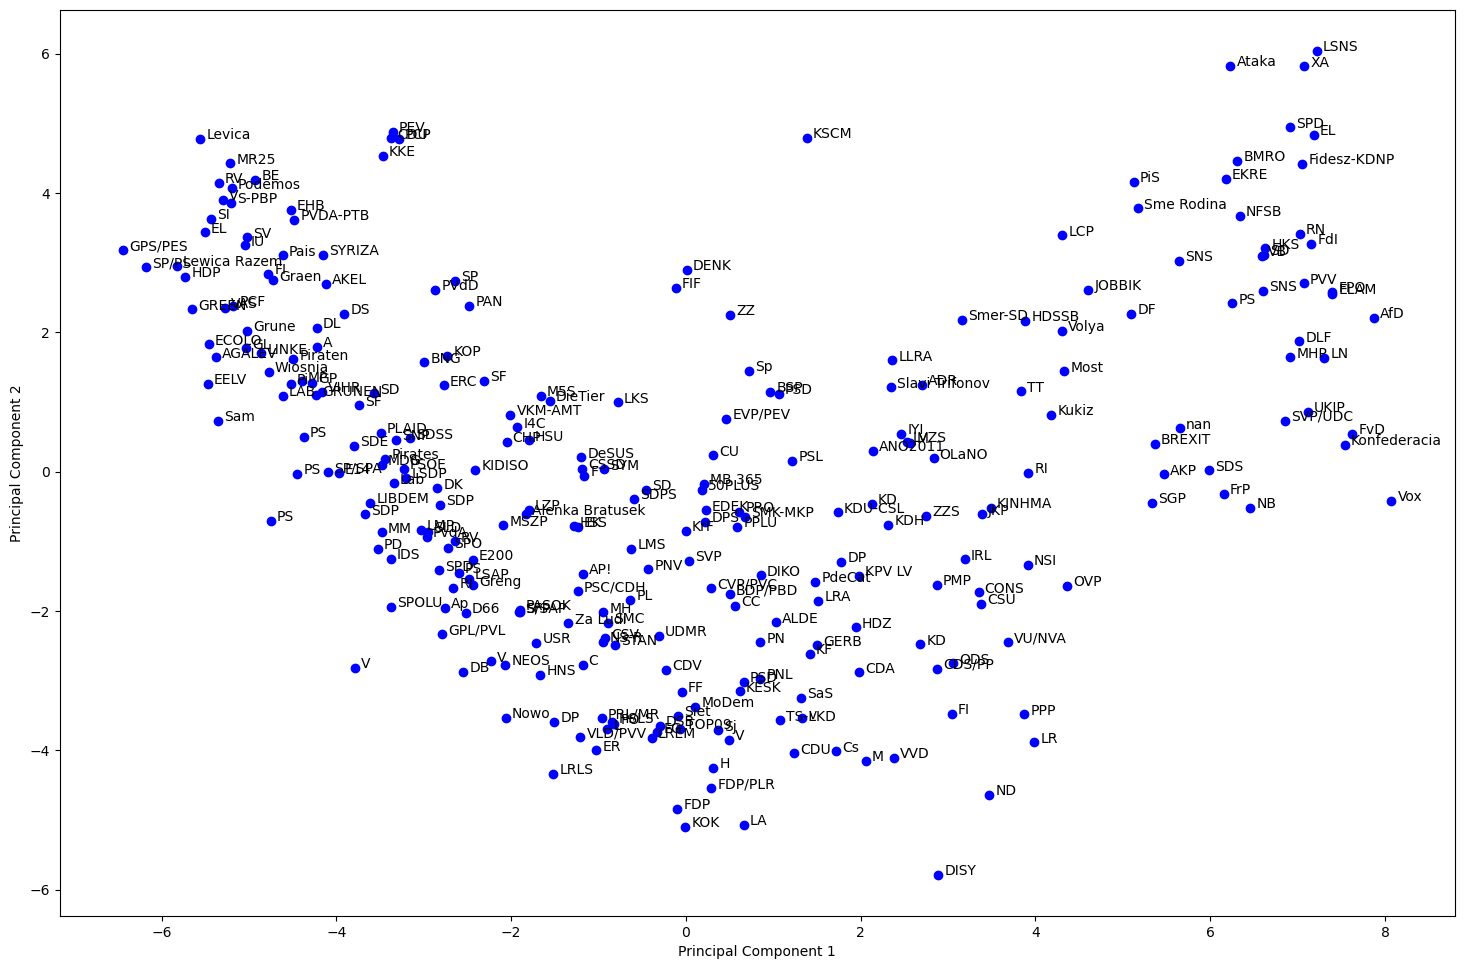

In [17]:
fig=plt.figure(figsize=(18,12), dpi= 100, facecolor='w', edgecolor='k')
for index, row in df_pca.iterrows():
    plt.scatter(row['pc_1']-0.07, row['pc_2'], color = 'blue')
    plt.annotate(row['party'], (row['pc_1'], row['pc_2']))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Let's do a simple sanity check and check whether extreme -left\-right\-libertarian\-authoritarian parties end up in the same clusters. For that we check 'galtan' and 'lrecon' features as the most explicit ones

In [18]:
# (From codebook) 
# GALTAN = position of the party in 2019 in terms of their views on social and cultural values.
# “Libertarian” or “postmaterialist” parties favor expanded personal freedoms, for example, abortion
# rights, divorce, and same-sex marriage. “Traditional” or “authoritarian”

# 0 = Libertarian/Postmaterialist
# 10 = Traditional/Authoritarian

In [19]:
df['galtan'].mean()

4.9488649935018065

In [20]:
df['galtan'].std()

2.6940404183970887

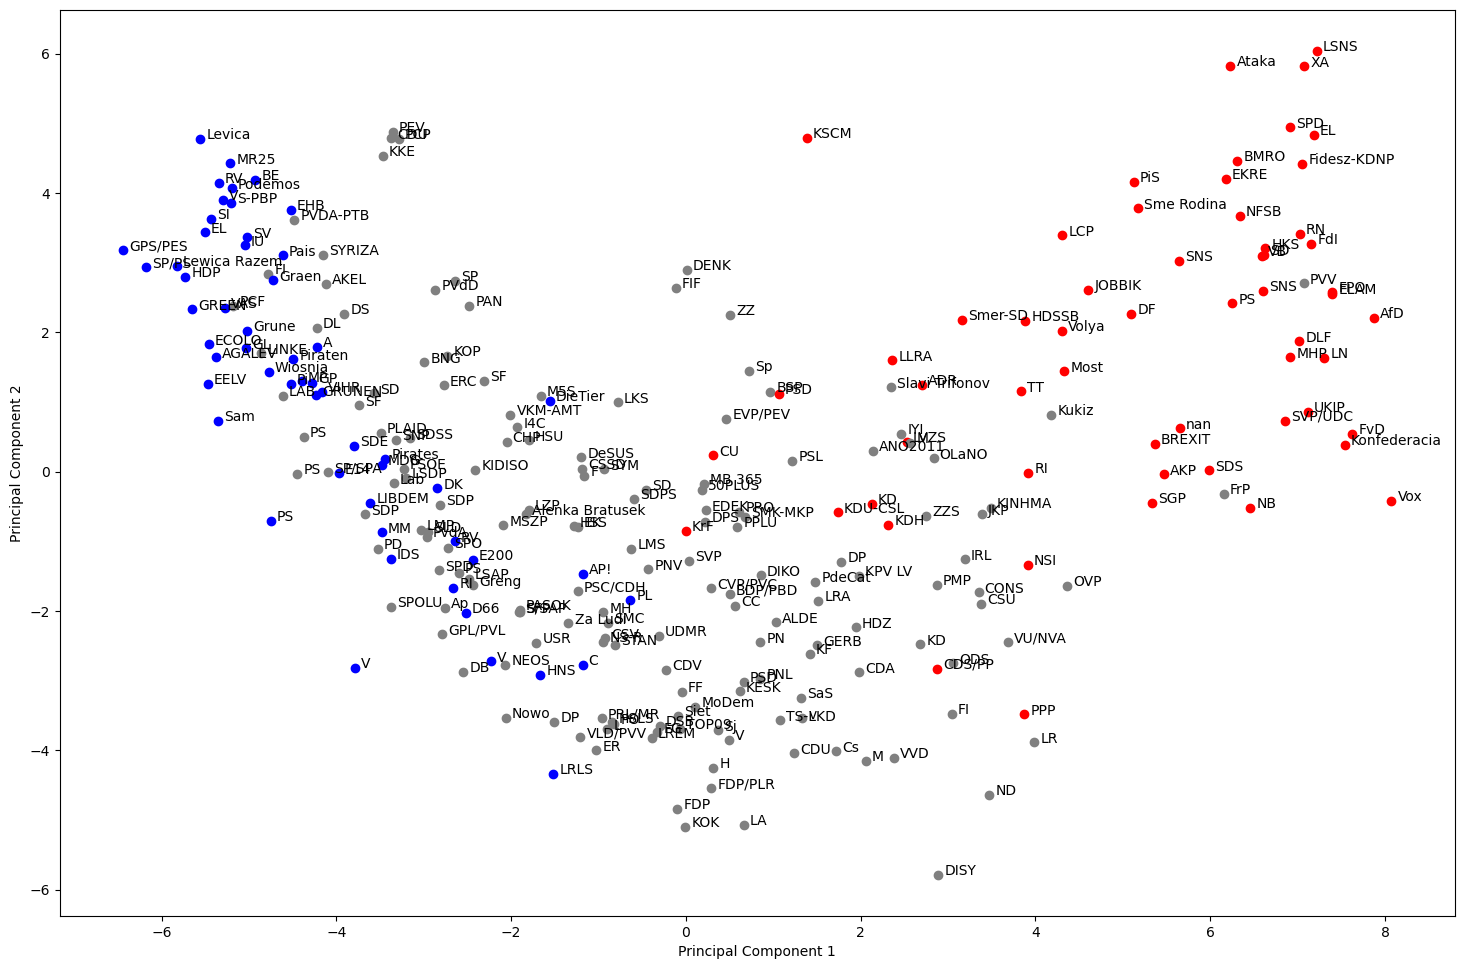

In [21]:
df_pca['galtan'] = df['galtan'] 
fig=plt.figure(figsize=(18,12), dpi= 100, facecolor='w', edgecolor='k')

for index, row in df_pca.iterrows():
    
    color = 'gray'
    
    if row['galtan'] > df['galtan'].mean() + df['galtan'].std():
        color = 'red'
    elif row['galtan'] < df['galtan'].mean() - df['galtan'].std():
        color = 'blue'
    
    plt.scatter(row['pc_1']-0.07, row['pc_2'], color = color)
    plt.annotate(row['party'], (row['pc_1'], row['pc_2']))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

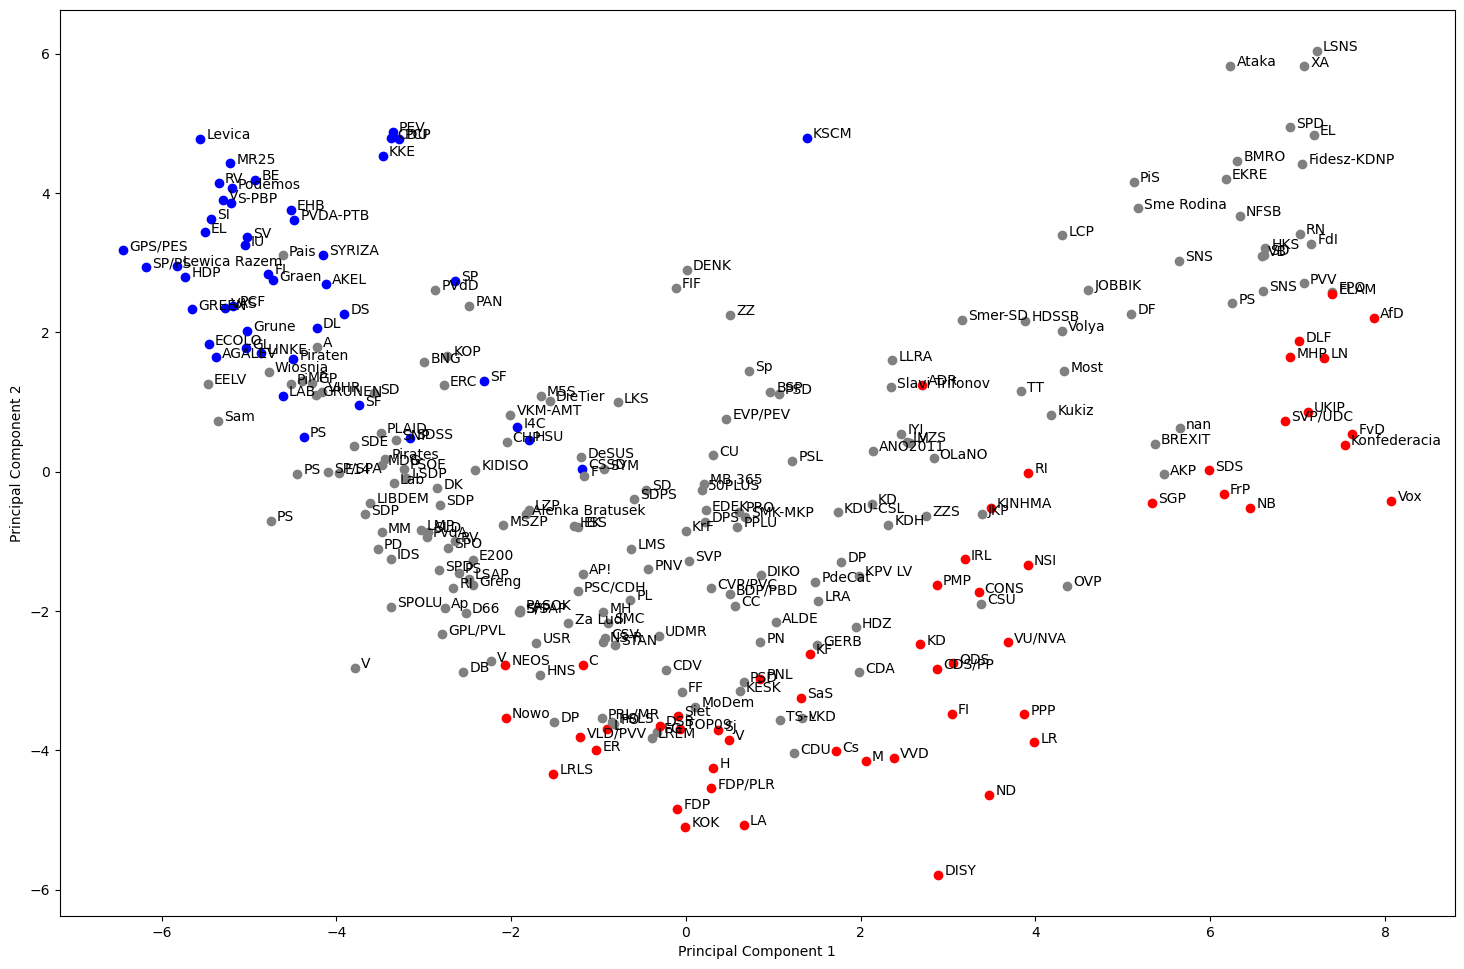

In [22]:
# (also from codebook)
# LRECON = position of the party in 2019 in terms of its ideological stance on economic issues.
# 0  extreme left
# 10 = extreme right

df_pca['lrecon'] = df['lrecon'] 
fig=plt.figure(figsize=(18,12), dpi= 100, facecolor='w', edgecolor='k')

for index, row in df_pca.iterrows():
    
    color = 'gray'
    
    if row['lrecon'] > df['lrecon'].mean() + df['lrecon'].std():
        color = 'red'
    elif row['lrecon'] < df['lrecon'].mean() - df['lrecon'].std():
        color = 'blue'
    
    plt.scatter(row['pc_1']-0.07, row['pc_2'], color = color)
    plt.annotate(row['party'], (row['pc_1'], row['pc_2']))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

not very accurate but still convincing

# 3.

## Estimate the distribution of the 2D points from Step 2.

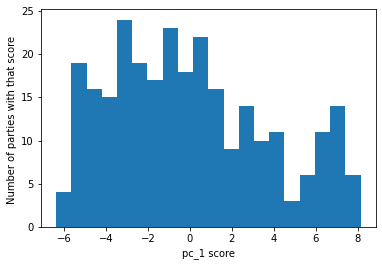

In [23]:
plt.hist(df_pca['pc_1'], bins=20)
plt.xlabel("pc_1 score")
plt.ylabel('Number of parties with that score ')
plt.show()

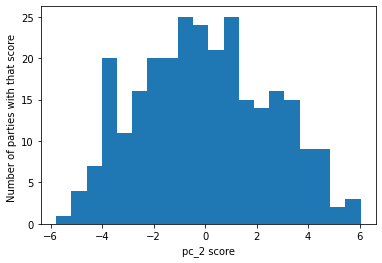

In [24]:
plt.hist(df_pca['pc_2'], bins=20)
plt.xlabel("pc_2 score")
plt.ylabel('Number of parties with that score ')
plt.show()

## Then take a random sample of 10 new political parties from that distribution. Visualize the distributions

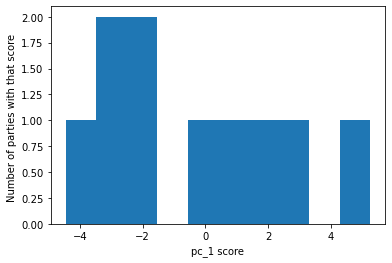

In [25]:
df_10_init = df_pca.sample(10)

df_10 = df_10_init

plt.hist(df_10['pc_1'])
plt.xlabel("pc_1 score")
plt.ylabel('Number of parties with that score ')
plt.show()

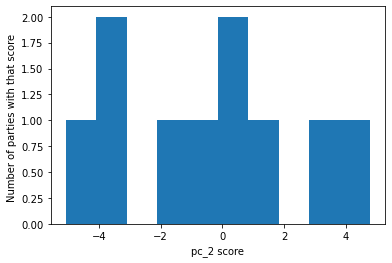

In [26]:
plt.hist(df_10['pc_2'])
plt.xlabel("pc_2 score")
plt.ylabel('Number of parties with that score ')
plt.show()

# 4. For the new political parties, find feature values from the high-dimensional space that map to the sampled 2D points

here we just do the reverse of what has been done before

In [27]:
# return to the proper format
df_10 = df_10[['pc_1', 'pc_2']]

In [28]:
# do reverse-PCA transformation
scores_reversed = pca.inverse_transform(df_10)

In [29]:
# do reverse scaling
scores_reversed_descaled = scaler.inverse_transform(scores_reversed)

In [30]:
# shapes are correct
scores_reversed_descaled.shape

(10, 43)

In [31]:
df_10_orig = pd.DataFrame()

for i, col in enumerate(features):
    df_10_orig[col] = scores_reversed_descaled[:, i]

Let's compare the data in the original dataset with the values with the same index

Ideally they should be identical, but since the variance of PCA was less than 0.5 it is expected that values would not be very accurate, but they at least more or less follow the general sense of data

In [32]:
# Original data re-indexed to resemble the order of the new sample. And then reversed 10-sample set
df[df.index.isin(df_10_init.index)].reindex(df_10_init.index)

,country,party,party_id,eu_position,eu_position_sd,eu_salience,eu_dissent,eu_blur,lrgen,lrecon,...,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership
103,12,PCP,1210,2.8,1.5,5.4,0.3,3.0,0.9,0.8,...,5.5,7.2,8.9,2.1,2.2,1.9,6.9,7.4,7.6,8.4
143,21,Pirates,2114,6.1,0.9,6.0,3.1,3.0,4.3,4.3,...,2.1,2.1,3.6,3.1,6.6,1.5,7.2,5.8,8.1,2.8
71,8,FI,815,4.9,1.0,5.8,4.1,5.0,6.9,7.8,...,6.4,3.1,3.8,4.7,2.7,4.8,4.1,4.2,2.5,9.1
18,2,LA,218,4.1,1.1,3.6,3.9,5.0,8.0,8.7,...,4.2,3.9,1.2,5.4,0.8,3.4,4.5,3.5,1.6,8.6
203,28,Sme Rodina,2818,3.1,1.1,4.3,4.2,4.5,7.1,4.9,...,8.4,5.8,7.2,6.5,2.5,7.3,6.2,8.3,6.8,9.3
274,45,Pi,4506,4.8,0.4,4.6,3.3,4.5,4.0,4.2,...,1.2,1.4,1.6,6.0,0.0,0.0,5.8,6.2,8.4,2.8
151,22,E200,2210,6.8,0.5,7.0,1.3,1.6,5.2,5.8,...,1.8,2.8,3.0,5.1,3.9,0.6,5.3,3.8,5.3,5.3
47,5,Cs,526,6.7,0.6,6.3,2.3,2.8,7.2,7.4,...,7.0,2.5,3.2,8.1,0.6,0.9,1.8,1.6,5.3,8.6
264,40,EDEK,4005,5.5,2.1,6.5,1.0,5.0,4.5,4.5,...,4.5,4.0,4.0,3.0,0.0,3.0,3.5,4.5,6.0,8.5
67,7,I4C,711,3.7,1.2,3.3,1.8,4.7,3.2,2.8,...,5.0,5.2,6.0,4.0,0.4,0.6,5.0,7.2,4.0,5.0


In [33]:
df_10_orig

,eu_position,eu_position_sd,eu_salience,eu_dissent,eu_blur,lrgen,lrecon,lrecon_sd,lrecon_salience,lrecon_dissent,...,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership
0,3.7,1.0,5.2,2.4,3.6,2.0,1.1,1.3,6.0,2.2,...,3.8,4.1,7.8,4.4,1.9,2.6,6.8,6.8,5.5,6.0
1,5.6,0.8,5.9,2.6,3.0,3.3,3.6,1.0,6.8,2.7,...,2.9,3.6,4.9,4.0,2.1,1.2,4.6,3.6,4.5,5.8
2,5.6,0.8,6.4,2.6,3.3,7.9,7.9,1.2,6.4,3.4,...,6.5,5.3,3.5,4.8,3.0,3.6,3.3,2.9,3.7,7.8
3,6.8,0.7,6.6,2.8,2.9,7.1,8.0,0.9,7.0,3.5,...,4.7,4.4,2.2,4.3,2.8,1.9,2.4,1.2,3.3,7.0
4,2.2,1.1,5.2,2.3,4.3,7.0,4.6,1.9,5.0,2.8,...,9.1,6.6,8.3,5.7,2.8,6.7,6.8,8.4,5.2,8.6
5,5.4,0.8,5.8,2.6,3.0,2.4,2.7,1.0,6.7,2.5,...,2.4,3.4,5.4,3.9,1.9,1.0,5.0,4.1,4.7,5.5
6,6.0,0.7,6.1,2.7,3.0,4.2,4.8,1.0,6.8,2.9,...,3.3,3.8,4.1,4.1,2.3,1.3,4.0,2.9,4.2,6.1
7,6.1,0.7,6.5,2.7,3.1,7.4,7.7,1.1,6.7,3.4,...,5.5,4.8,3.0,4.6,2.9,2.7,3.0,2.2,3.5,7.4
8,5.1,0.8,6.0,2.6,3.3,5.5,5.3,1.2,6.4,3.0,...,5.2,4.7,4.9,4.6,2.5,2.9,4.5,4.1,4.3,7.0
9,5.1,0.8,5.8,2.6,3.2,4.0,3.9,1.1,6.5,2.7,...,4.0,4.1,5.4,4.3,2.2,2.1,4.9,4.3,4.6,6.3


# 5.  [written in readme]